In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.linear_model import LinearRegression
#import sklearn
#print('The scikit-learn version is {}.'.format(sklearn.__version__))
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler, OneHotEncoder, StandardScaler,Normalizer
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc

%matplotlib inline

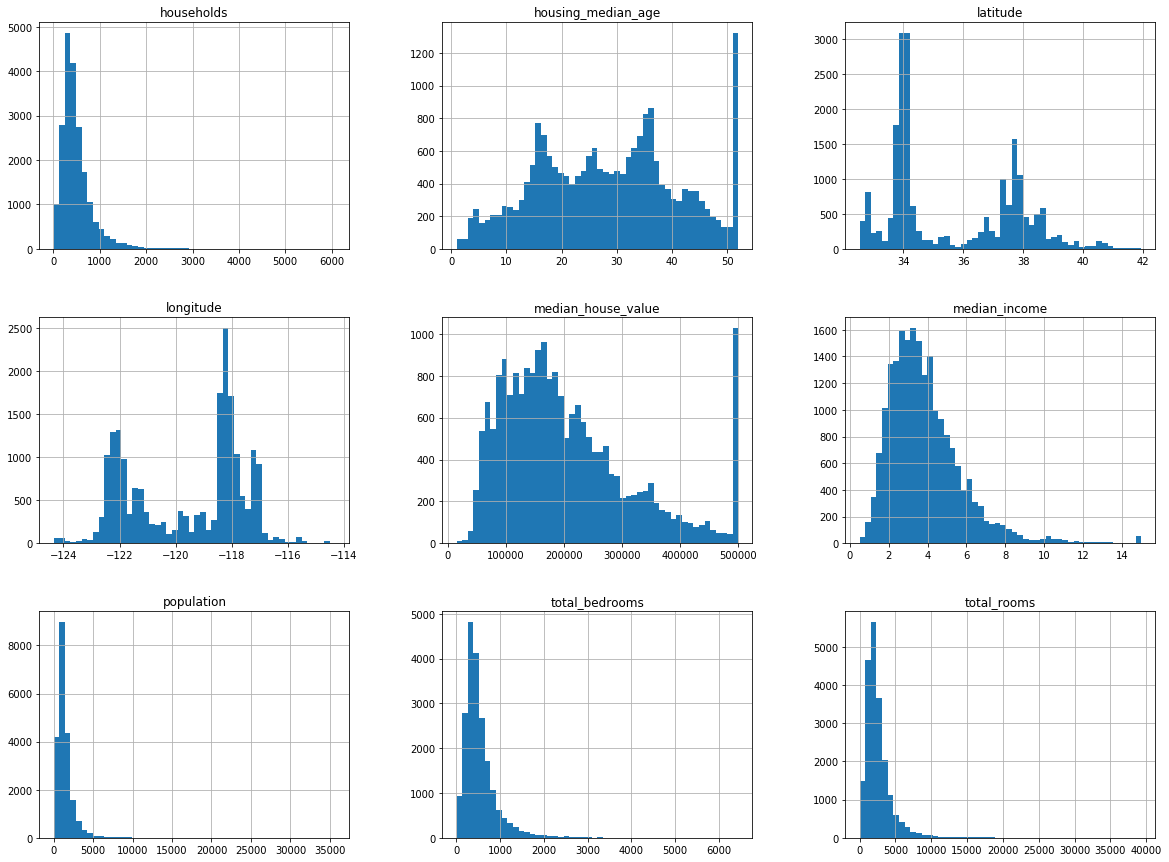

In [299]:
data = pd.read_csv('D:/Workspace/mlspace/datasets/housing.csv')

data.hist(bins=50, figsize=(20,15))
plot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A5BAD03D30>,
      dtype=object)

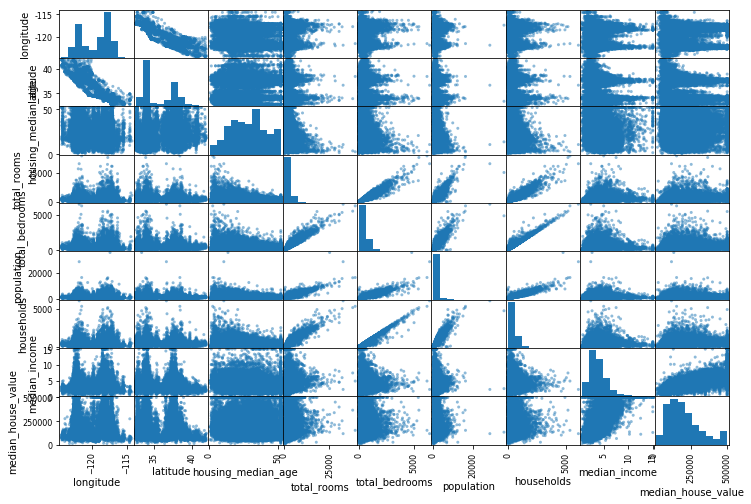

In [300]:
attributes = ["longitude", "latitude", "housing_median_age", "total_rooms","total_bedrooms", 
              "population","households","median_income","ocean_proximity","median_house_value"]
scatter_matrix(data[attributes], figsize=(12, 8))

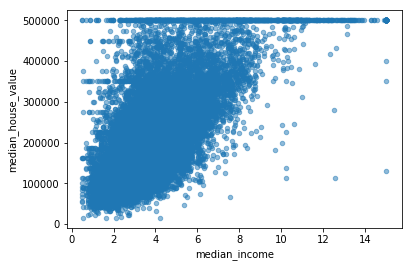

In [301]:
data.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.5)

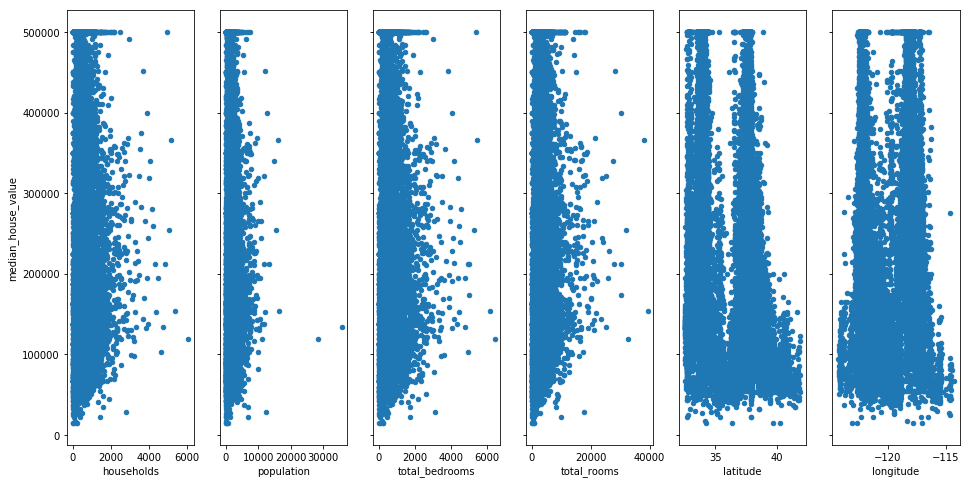

In [302]:
fig, axs = plot.subplots(1, 6, sharey=True)
data.plot(kind='scatter', x='households', y='median_house_value', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='population', y='median_house_value', ax=axs[1])
data.plot(kind='scatter', x='total_bedrooms', y='median_house_value', ax=axs[2])
data.plot(kind='scatter', x='total_rooms', y='median_house_value', ax=axs[3])
data.plot(kind='scatter', x='latitude', y='median_house_value', ax=axs[4])
data.plot(kind='scatter', x='longitude', y='median_house_value', ax=axs[5])

In [303]:
data['housing_median_age'] = data.housing_median_age.astype(float)
data['total_rooms'] = data.total_rooms.astype(float)
data['population'] = data.population.astype(float)
data['households'] = data.households.astype(float)
data['median_house_value'] = data.median_house_value.astype(float)

data['avg_rooms'] = data['total_rooms']/data['households']
data['avg_bedrooms'] = data['total_bedrooms']/data['households']
data['pop_household'] = data['population']/data['households']

list(data.columns.values)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'median_house_value',
 'avg_rooms',
 'avg_bedrooms',
 'pop_household']

In [304]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,avg_rooms,avg_bedrooms,pop_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0,6.281853,1.081081,2.181467


In [305]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_rooms,avg_bedrooms,pop_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.013402,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,0.070025,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,-0.077918,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.133798,0.029373,-0.024581
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,0.045887,-0.028355
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.072213,-0.066510,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.080598,-0.055158,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.326895,-0.062299,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.046739,-0.023737
avg_rooms,-0.027540,0.106389,-0.153277,0.133798,0.001538,-0.072213,-0.080598,0.326895,0.151948,1.000000,0.848616,-0.004852


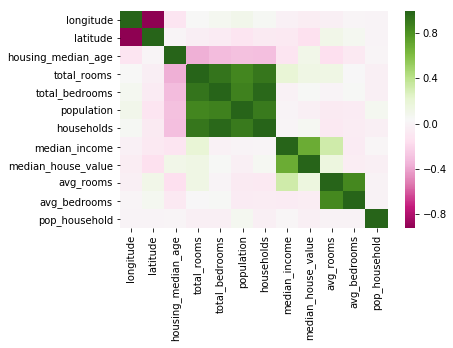

In [306]:
sns.heatmap(data.corr(), cmap="PiYG")

In [307]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
median_house_value    float64
avg_rooms             float64
avg_bedrooms          float64
pop_household         float64
dtype: object

In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null float64
avg_rooms             20640 non-null float64
avg_bedrooms          20433 non-null float64
pop_household         20640 non-null float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [309]:
data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [310]:
data.isnull().values.sum()

414

In [311]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
avg_rooms               0
avg_bedrooms          207
pop_household           0
dtype: int64

In [312]:
imputed_data = data.fillna((data.mean()), inplace=False)

print(imputed_data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
avg_rooms             0
avg_bedrooms          0
pop_household         0
dtype: int64


In [313]:
imputed_data_copy = imputed_data.copy()

#print(imputed_encoded_data.columns.tolist())

preprocess_transform = make_column_transformer((OneHotEncoder(), ['ocean_proximity']))

oh_encoded_array = preprocess_transform.fit_transform(imputed_data_copy).toarray()
print(oh_encoded_array.shape)
oh_encoded_data = pd.DataFrame(oh_encoded_array, columns=['ocean_proximitity_0', 'ocean_proximitity_1', 'ocean_proximitity_2', 'ocean_proximitity_3', 'ocean_proximitity_4'])

oh_encoded_data.head()
imputed_data_copy.reset_index(drop=True, inplace=True)
oh_encoded_data.reset_index(drop=True, inplace=True)

#imputed_encoded_data = imputed_data_copy.join(oh_encoded_data)
imputed_encoded_data = pd.concat([imputed_data_copy, oh_encoded_data], axis=1, sort=False)

imputed_encoded_data.head()

(20640, 5)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,avg_rooms,avg_bedrooms,pop_household,ocean_proximitity_0,ocean_proximitity_1,ocean_proximitity_2,ocean_proximitity_3,ocean_proximitity_4
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0,6.984127,1.023810,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0,6.238137,0.971880,2.109842,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0,8.288136,1.073446,2.802260,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0,5.817352,1.073059,2.547945,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0,6.281853,1.081081,2.181467,0.0,0.0,0.0,1.0,0.0


In [314]:
final_imputed_encoded_data = imputed_encoded_data.drop(['ocean_proximity'],axis=1, inplace=False)

final_imputed_encoded_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_rooms,avg_bedrooms,pop_household,ocean_proximitity_0,ocean_proximitity_1,ocean_proximitity_2,ocean_proximitity_3,ocean_proximitity_4
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,1.023810,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.971880,2.109842,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,1.073446,2.802260,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,1.073059,2.547945,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,1.081081,2.181467,0.0,0.0,0.0,1.0,0.0


In [315]:
stdScaler = StandardScaler()

unscaled_data = final_imputed_encoded_data.copy()

colNames = unscaled_data.columns

stdScaled_imputed_encoded_data = stdScaler.fit_transform(unscaled_data)
stdScaled_imputed_encoded_data = pd.DataFrame(stdScaled_imputed_encoded_data, columns=colNames)

In [316]:
stdScaled_imputed_encoded_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_rooms,avg_bedrooms,pop_household,ocean_proximitity_0,ocean_proximitity_1,ocean_proximitity_2,ocean_proximitity_3,ocean_proximitity_4
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,2.129631,0.628559,-0.154640,-0.049597,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.314156,0.327041,-0.264265,-0.092512,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.258693,1.155620,-0.049855,-0.025843,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.165100,0.156966,-0.050671,-0.050329,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.172900,0.344711,-0.033737,-0.085616,-0.891156,-0.681889,-0.015566,2.830742,-0.384466


In [317]:
list(stdScaled_imputed_encoded_data.columns.values)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'avg_rooms',
 'avg_bedrooms',
 'pop_household',
 'ocean_proximitity_0',
 'ocean_proximitity_1',
 'ocean_proximitity_2',
 'ocean_proximitity_3',
 'ocean_proximitity_4']

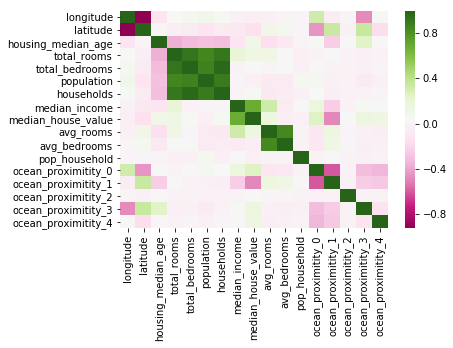

In [318]:
sns.heatmap(stdScaled_imputed_encoded_data.corr(), cmap="PiYG")

In [319]:
stdScaled_imputed_encoded_data.to_csv(path_or_buf='D:/Workspace/mlspace/datasets/housing_std.csv', header=True, index=False)
stdScaled_imputed_encoded_data.columns[(stdScaled_imputed_encoded_data < 0).any()].tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'avg_rooms',
 'avg_bedrooms',
 'pop_household',
 'ocean_proximitity_0',
 'ocean_proximitity_1',
 'ocean_proximitity_2',
 'ocean_proximitity_3',
 'ocean_proximitity_4']

In [320]:
normalizer = Normalizer()

unnormalized_data = final_imputed_encoded_data.copy()

colNames = unnormalized_data.columns

normalized_imputed_encoded_data = stdScaler.fit_transform(unnormalized_data)
normalized_imputed_encoded_data = pd.DataFrame(normalized_imputed_encoded_data, columns=colNames)

normalized_imputed_encoded_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_rooms,avg_bedrooms,pop_household,ocean_proximitity_0,ocean_proximitity_1,ocean_proximitity_2,ocean_proximitity_3,ocean_proximitity_4
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,2.129631,0.628559,-0.154640,-0.049597,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.314156,0.327041,-0.264265,-0.092512,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.258693,1.155620,-0.049855,-0.025843,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.165100,0.156966,-0.050671,-0.050329,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.172900,0.344711,-0.033737,-0.085616,-0.891156,-0.681889,-0.015566,2.830742,-0.384466


In [321]:
normalized_imputed_encoded_data.columns[(normalized_imputed_encoded_data < 0).any()].tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'avg_rooms',
 'avg_bedrooms',
 'pop_household',
 'ocean_proximitity_0',
 'ocean_proximitity_1',
 'ocean_proximitity_2',
 'ocean_proximitity_3',
 'ocean_proximitity_4']

In [322]:
stdScaled_imputed_encoded_data_copy = stdScaled_imputed_encoded_data.copy()
stdScaled_imputed_encoded_data_copy.drop(['longitude','latitude','total_bedrooms','population','avg_rooms','avg_bedrooms','pop_household'], axis=1,inplace=True)

In [323]:
target = stdScaled_imputed_encoded_data_copy['median_house_value']
features = stdScaled_imputed_encoded_data_copy[['median_income','total_rooms','housing_median_age','households','ocean_proximitity_0','ocean_proximitity_1', 'ocean_proximitity_2','ocean_proximitity_3', 'ocean_proximitity_4']].copy()

x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=0)
lm = LinearRegression()

lm.fit(x_train, y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

0.002208333958308422
[ 6.67394836e-01 -1.30255186e-01  1.29561969e-01  2.02218850e-01
  5.65572349e+12  5.30004516e+12  1.77203757e+11  3.57619722e+12
  3.81401302e+12]


In [324]:
x_dataframe = sm.add_constant(x_train)

est = sm.OLS(y_train, x_dataframe).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     3008.
Date:                Tue, 15 Jan 2019   Prob (F-statistic):               0.00
Time:                        15:55:05   Log-Likelihood:                -14721.
No. Observations:               15480   AIC:                         2.946e+04
Df Residuals:                   15471   BIC:                         2.953e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0029      0.005      0.579      0.563      -0.007       0.013
median_income           0.6676      0.006    107.573      0.000       0.655       0.680
total_rooms            -0.1291      0.015     -8.429      0.000      -0.159      -0.099
housing_median_age      0.1303      0.006     22.633      0.000       0.119       0.142
households              0.2015      0.015     13.521      0.000       0.172       0.231
ocean_proximitity_0     0.0664      0.003     19.962      0.000       0.060       0.073
ocean_proximitity_1    -0.1953      0.004    -50.100      0.000      -0.203      -0.188
ocean_proximitity_2     0.0283      0.006      5.028      0.000       0.017       0.039
ocean_proximitity_3     0.0746      0.005     16.553      0.000       0.066       0.083
ocean_proximitity_4     0.1016      0.004     24.217      0.000       0.093       0.110
==============================================================================
Omnibus:                     3553.489   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9199.695
Skew:                           1.245   Prob(JB):                         0.00
Kurtosis:                       5.839   Cond. No.                     1.93e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.03e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [325]:
linear_regression_predictions = lm.predict(x_test)
linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)
linear_regression_mse = np.sqrt(linear_regression_mse)
linear_regression_mse

0.6330917413330254

In [326]:
stdScaled_imputed_encoded_data_copy = stdScaled_imputed_encoded_data.copy()
target = stdScaled_imputed_encoded_data_copy['median_house_value']
features = stdScaled_imputed_encoded_data_copy[list(filter(lambda colName: colName != 'median_house_value', stdScaled_imputed_encoded_data_copy))].copy()
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=0)

dt_regressor = DecisionTreeRegressor(criterion="mse",min_samples_leaf=10)
dt_regressor.fit(x_train, y_train)
dt_predictions = dt_regressor.predict(x_test)
dt_regressor_mse = mean_squared_error(y_test, dt_predictions)
dt_regressor_mse = np.sqrt(dt_regressor_mse)
dt_regressor_mse

0.5156229147864553

In [327]:
# TODO: Measure/Plot DecisionTreeRegressor metrics

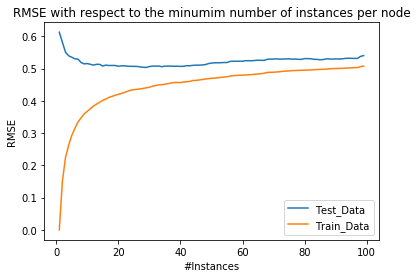

In [328]:
fig = plot.figure()
ax0 = fig.add_subplot(111) 
dt_regressor_rmse_train = []
dt_regressor_rmse_test = []
for i in range(1,100):
    #Paramterize the model and let i be the number of minimum instances per leaf node
    dt_regressor_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=i)   
    #Train the model
    dt_regressor_model.fit(x_train,y_train)
    #Predict query instances
    dt_predicted_train = dt_regressor_model.predict(x_train)
    dt_predicted_test = dt_regressor_model.predict(x_test)
    #Calculate and append the RMSEs
    dt_regressor_rmse_train.append(np.sqrt(mean_squared_error(y_train, dt_predicted_train)))
    dt_regressor_rmse_test.append(np.sqrt(mean_squared_error(y_test, dt_predicted_test)))
   
ax0.plot(range(1,100),dt_regressor_rmse_test,label='Test_Data')
ax0.plot(range(1,100),dt_regressor_rmse_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plot.show()